<a href="https://colab.research.google.com/github/PDeySarkar103/XAS/blob/main/XAS_SDSS_Classification_using_ML_algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [32]:
from warnings import filterwarnings
filterwarnings(action='ignore')

In [33]:
import time #For getting time elapsed for each algorithm

# Loading Datasets

In [34]:
!pip install astroquery

In [35]:
from astroquery.sdss import SDSS

query = """SELECT TOP 500000
p.objid,p.ra,p.dec,p.u,p.g,p.r,p.i,p.z,
 p.run, p.rerun, p.camcol, p.field,
s.specobjid, s.class, s.z as redshift,
s.plate, s.mjd, s.fiberid
FROM PhotoObj AS p
JOIN SpecObj AS s ON s.bestobjid = p.objid
"""
res = SDSS.query_sql(query, data_release=18)
df = res.to_pandas()
df.to_csv('SDSS18.csv')

In [36]:
#from google.colab import files
#uploaded=files.upload()

In [37]:
#df=pd.read_csv('SDSS_DR18.csv')

In [38]:
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1237660961327743273,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,b'GALAXY',0.634794,5812,56354,171
1,1237664879951151463,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,b'GALAXY',0.779136,10445,58158,427
2,1237660961330430096,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,b'GALAXY',0.644195,4576,55592,299
3,1237663478724298013,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,b'GALAXY',0.932346,9149,58039,775
4,1237680272041377978,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,b'GALAXY',0.116123,6121,56187,842


In [39]:
df.shape

(500000, 18)

# EDA(Exploratory Data Analysis)

In [40]:
df.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   objid      500000 non-null  int64  
 1   ra         500000 non-null  float64
 2   dec        500000 non-null  float64
 3   u          500000 non-null  float64
 4   g          500000 non-null  float64
 5   r          500000 non-null  float64
 6   i          500000 non-null  float64
 7   z          500000 non-null  float64
 8   run        500000 non-null  int64  
 9   rerun      500000 non-null  int64  
 10  camcol     500000 non-null  int64  
 11  field      500000 non-null  int64  
 12  specobjid  500000 non-null  float64
 13  class      500000 non-null  object 
 14  redshift   500000 non-null  float64
 15  plate      500000 non-null  int64  
 16  mjd        500000 non-null  int64  
 17  fiberid    500000 non-null  int64  
dtypes: float64(9), int64(8), object(1)
memory usage: 68.7+ MB


In [42]:
df.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,5.000000e+05,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.0,500000.000000,500000.000000,5.000000e+05,500000.000000,500000.000000,500000.000000,500000.000000
mean,1.237665e+18,173.691592,24.427392,21.423621,19.974224,19.147930,18.518032,18.136320,4495.943492,301.0,3.226088,184.061602,5.740706e+18,0.573810,5098.664058,55574.507918,440.040976
std,8.552950e+12,95.844510,19.760260,81.440661,80.180636,67.973349,72.260551,76.310731,1991.390236,0.0,1.615030,140.132395,3.285969e+18,0.725711,2918.509230,1799.696190,273.488158
min,1.237646e+18,0.000095,-18.865961,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,109.000000,301.0,1.000000,11.000000,2.994897e+17,-0.010932,266.000000,51608.000000,1.000000
25%,1.237658e+18,126.767527,6.458348,20.322100,18.904417,18.047997,17.644170,17.380840,2986.000000,301.0,2.000000,83.000000,2.861038e+18,0.066157,2541.000000,54259.000000,209.000000
50%,1.237664e+18,173.430782,23.257874,22.183515,21.090585,20.103140,19.379640,18.975810,4263.000000,301.0,3.000000,148.000000,5.616262e+18,0.425271,4988.000000,55882.000000,417.000000
75%,1.237670e+18,229.763325,40.000944,23.710103,22.123810,21.008212,20.331470,19.869903,5598.000000,301.0,5.000000,246.000000,8.192137e+18,0.688225,7276.000000,56713.000000,639.000000
max,1.237681e+18,359.999810,84.490494,32.781390,31.602240,31.990100,32.141470,29.514250,8162.000000,301.0,6.000000,1000.000000,1.412694e+19,7.051930,12547.000000,58932.000000,1000.000000


In [43]:
df['class'].nunique() # Shows no. of unique entries in the class column

3

In [44]:
df['class'].unique() # The unique elements in class column

array([b'GALAXY', b'QSO', b'STAR'], dtype=object)

In [45]:
df['class'].value_counts()

b'GALAXY'    305562
b'STAR'      101575
b'QSO'        92863
Name: class, dtype: int64

# Visualization of Data

## Histogram plot

In [46]:
sns.set(style='darkgrid',palette='dark')

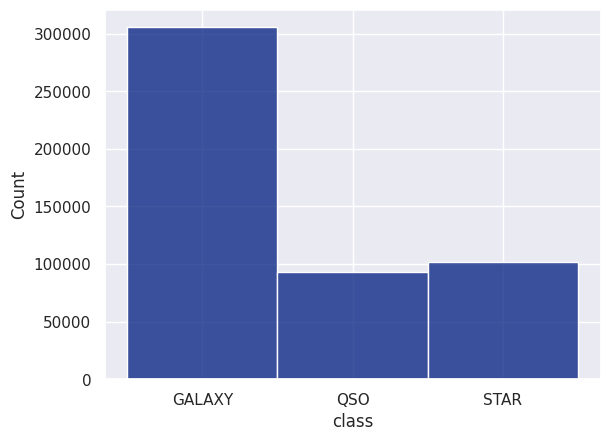

In [47]:
sns.histplot(x=df['class'])
plt.show()

## Correlation Matrix

<Axes: >

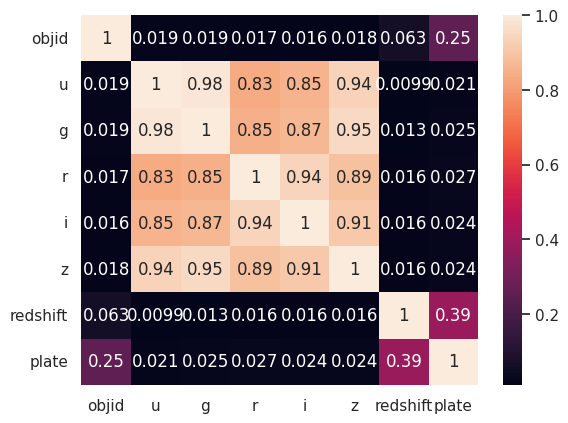

In [48]:
# Heatmap for expressing correlation

#plt.figure(figsize=(15,10))
sns.heatmap(df.drop(['ra','dec','run','rerun','camcol','field','specobjid','mjd','fiberid'],axis = 1).corr(),annot = True)

## Pairplot

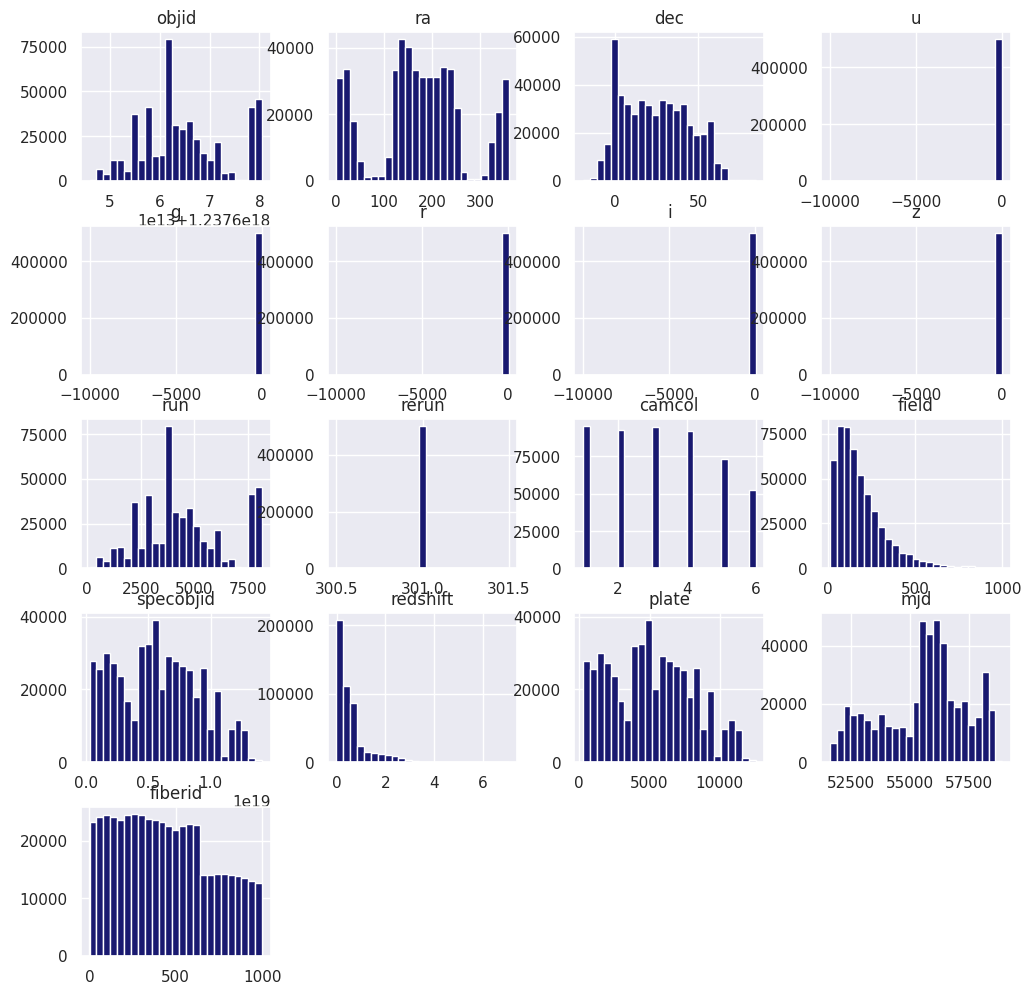

In [49]:
df.hist(bins=25,figsize=(12,12),color='midnightblue')
plt.show()

# Machine Learning Algorithms

## Feature Selection

In [50]:
X=df[['u','g','r','i','z','redshift','plate']]
X

,u,g,r,i,z,redshift,plate
0,23.87882,22.27530,20.39501,19.16573,18.79371,0.634794,5812
1,24.77759,22.83188,22.58444,21.16812,21.61427,0.779136,10445
2,25.26307,22.66389,20.60976,19.34857,18.94827,0.644195,4576
3,22.13682,23.77656,21.61162,20.50454,19.25010,0.932346,9149
4,19.43718,17.58028,16.49747,15.97711,15.54461,0.116123,6121
...,...,...,...,...,...,...,...
499995,24.24111,21.85787,21.44129,20.97722,20.77483,1.274592,6975
499996,23.71156,21.13606,20.63208,20.52897,20.62295,0.000129,6833
499997,21.48006,21.30893,21.35268,20.78115,20.77501,1.904820,8232
499998,21.76996,21.39964,21.15382,20.92908,20.90284,1.476363,10260


In [51]:
Y=df['class']
Y

0         b'GALAXY'
1         b'GALAXY'
2         b'GALAXY'
3         b'GALAXY'
4         b'GALAXY'
            ...    
499995       b'QSO'
499996      b'STAR'
499997       b'QSO'
499998       b'QSO'
499999    b'GALAXY'
Name: class, Length: 500000, dtype: object

## Encoding

In [52]:
#encoder={'GALAXY':1,'STAR':0,'QSO':2}
#df['class']=df['class'].map(encoder)

In [53]:
#df['class'].value_counts()

In [54]:
# We can also use scikit learn for this
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
Y=LE.fit_transform(Y)

In [55]:
Y

array([0, 0, 0, ..., 1, 1, 0])

In [56]:
# GALAXY= 0
# QSO   = 1
# STAR  = 2

In [57]:
df['class'].value_counts()

b'GALAXY'    305562
b'STAR'      101575
b'QSO'        92863
Name: class, dtype: int64

## Resampling

In [58]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 30, k_neighbors = 5)
X_res, Y_res = sm.fit_resample(X, Y)

In [59]:
#Y_res.value_counts()

## Splitting Datasets

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_res,Y_res,test_size=0.25,random_state=30)

In [61]:
X_train

,u,g,r,i,z,redshift,plate
16276,19.363370,18.082650,17.578550,17.409290,17.319390,-0.000091,2682
441291,22.167510,20.433480,19.166270,18.655530,18.355970,0.189887,9157
383200,20.958030,20.296100,19.967780,19.930520,19.869860,1.277148,2671
636352,22.174665,21.496885,21.310397,21.281261,21.860547,1.418293,8433
335771,22.827470,22.069400,20.544020,19.651150,19.106110,0.505023,4079
...,...,...,...,...,...,...,...
328599,20.971790,19.598020,19.062300,18.850760,18.779610,-0.000171,8510
570508,22.988437,21.653119,21.480514,21.367319,20.740929,2.439029,4206
885236,19.063334,17.675682,17.134972,16.952287,16.891784,0.000028,2389
572333,21.992413,21.649630,21.672277,21.451118,21.477146,1.535483,7422


In [62]:
y_train

array([2, 0, 1, ..., 2, 1, 0])

## Classification Algorithms

In [63]:
# Creating a dataframe to store the accuracy scores of all the classification algorithms so that we are able to choose the best one

score_df=pd.DataFrame(columns=['Algorithm','Recall_Score','Time'])

In [64]:
score_df

,Algorithm,Recall_Score,Time


### Logistic Regression

In [65]:
# Training the ML model

from sklearn.linear_model import LogisticRegression

model=LogisticRegression(max_iter=1000)

start_time=time.time()
model.fit(X_train,y_train)
end_time=time.time()

y_pred1=model.predict(X_test)

LR_time=end_time-start_time

Text(46.25, 0.5, 'Prediction')

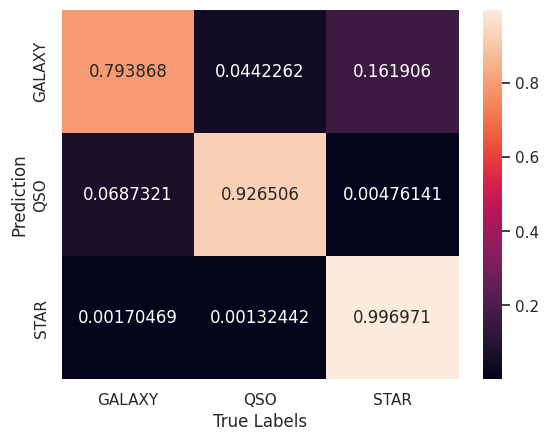

In [66]:
# Generating the confusion matrix

from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(y_test,y_pred1,normalize='true')
sns.heatmap(cm_lr,annot=True,fmt='g',xticklabels=['GALAXY','QSO','STAR'],yticklabels=['GALAXY','QSO','STAR'])
plt.xlabel('True Labels')
plt.ylabel('Prediction')

In [67]:
# Getting the Recall score

from sklearn.metrics import recall_score
LR_score=recall_score(y_test,y_pred1,average='weighted')
#print(LR_score)
# Adding Recall Score to the table

score_df=score_df.append({'Algorithm':'Logistic Regression','Recall_Score':LR_score,'Time':LR_time},ignore_index=True)
score_df

,Algorithm,Recall_Score,Time
0,Logistic Regression,0.905577,177.109603


### Decision Tree

In [68]:
# Training the ML model

from sklearn.tree import DecisionTreeClassifier

model=DecisionTreeClassifier(criterion='entropy',random_state=30)

start_time=time.time()
model.fit(X_train,y_train)
end_time=time.time()

y_pred2=model.predict(X_test)
DT_time=end_time-start_time

Text(46.25, 0.5, 'Prediction')

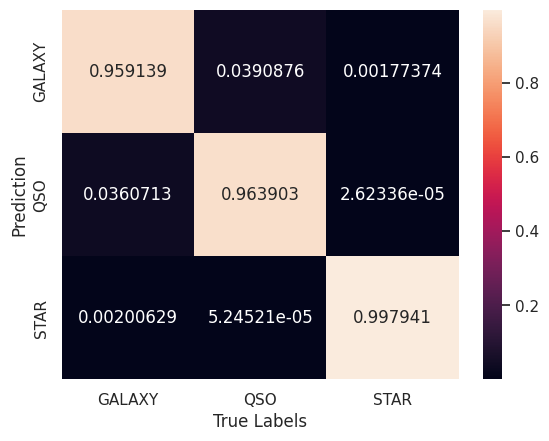

In [69]:
# Generating the Confusion Matrix

from sklearn.metrics import confusion_matrix
cm_dt=confusion_matrix(y_test,y_pred2,normalize='true')

sns.heatmap(cm_dt,annot=True,fmt='g',xticklabels=['GALAXY','QSO','STAR'],yticklabels=['GALAXY','QSO','STAR'])
plt.xlabel('True Labels')
plt.ylabel('Prediction')

In [70]:
# Getting the Recall score

from sklearn.metrics import recall_score
dt_score=recall_score(y_test,y_pred2,average='weighted')
#print(LR_score)
# Adding Recall Score to the table

score_df=score_df.append({'Algorithm':'Decision Tree','Recall_Score':dt_score,'Time':DT_time},ignore_index=True)
score_df

,Algorithm,Recall_Score,Time
0,Logistic Regression,0.905577,177.109603
1,Decision Tree,0.973636,15.960287


### Random Forest

In [71]:
# First, we'll create a dataframe where we'll store recall score of random forest algorithm with different values of n_estimators
# Then, we'll choose the maximum one and consider that as the recall score

rf_df=pd.DataFrame(columns=['Estimators','Recall score'])

In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score

start_time=time.time()
for i in range(1,31):
  model=RandomForestClassifier(criterion='gini',n_estimators=i,random_state=30)
  model.fit(X_train,y_train)
  y_pred3=model.predict(X_test)
  rf_df=rf_df.append({'Estimators':i,'Recall score':recall_score(y_test,y_pred3,average='weighted')},ignore_index=True)


In [74]:
rf_df

,Estimators,Recall score
0,1.0,0.968552
1,2.0,0.971925
2,3.0,0.978291
3,4.0,0.979382
4,5.0,0.980290
5,6.0,0.980800
6,7.0,0.981237
7,8.0,0.981424
8,9.0,0.981769
9,10.0,0.981817


In [75]:
# Sorting

rf_df=rf_df.sort_values(by='Recall score',ascending=False)
rf_df.head()

,Estimators,Recall score
37,25.0,0.982790
35,23.0,0.982777
42,30.0,0.982768
36,24.0,0.982755
39,27.0,0.982725


The above table shows that the recall score is highest for n=29.0. So we'll keep n_estimators=29.0

In [76]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=29,random_state=30)
model.fit(X_train,y_train)
end_time=time.time()
y_pred3=model.predict(X_test)

RF_time=end_time-start_time

from sklearn.metrics import recall_score
rf_score=recall_score(y_test,y_pred3,average='weighted')
rf_score

0.9827029480041192

In [77]:
# Adding accuracy to the data frame
score_df=score_df.append({'Algorithm':'Random Forest','Recall_Score':rf_score,'Time':RF_time},ignore_index=True)
score_df

,Algorithm,Recall_Score,Time
0,Logistic Regression,0.905577,177.109603
1,Decision Tree,0.973636,15.960287
2,Random Forest,0.982703,1795.928527


Text(46.25, 0.5, 'Prediction')

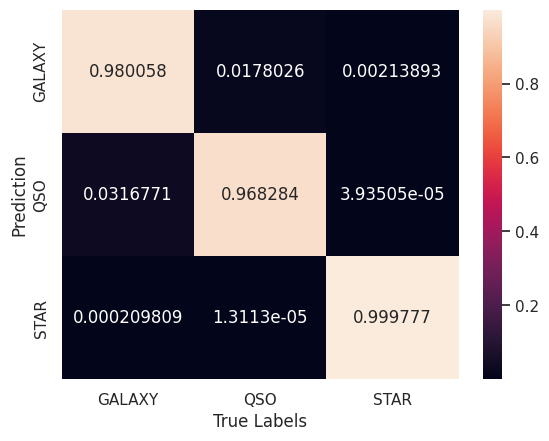

In [78]:
# Generating the confusion matrix
from sklearn.metrics import confusion_matrix

cm_rf=confusion_matrix(y_test,y_pred3,normalize='true')

sns.heatmap(cm_rf,annot=True,fmt='g',xticklabels=['GALAXY','QSO','STAR'],yticklabels=['GALAXY','QSO','STAR'])
plt.xlabel('True Labels')
plt.ylabel('Prediction')

### KNN

In [79]:
# We'll create a dataframe to store recall score of K Neighbour Classifiers with different n_neighbour values.
# From there, we shall choose the maximum one and consider that as recall score for KNN algo.

knn_df=pd.DataFrame(columns=['Neighbors','Recall Score'])

In [80]:
# Algorithm

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score

start_time=time.time()
for i in range(1,31):
  model=KNeighborsClassifier(n_neighbors=i)
  model.fit(X_train,y_train)
  y_pred4=model.predict(X_test)
  knn_df=knn_df.append({'Neighbors':i,'Recall Score':recall_score(y_test,y_pred4,average='weighted')},ignore_index=True)

knn_df

,Neighbors,Recall Score
0,1.0,0.949366
1,2.0,0.936628
2,3.0,0.938112
3,4.0,0.931113
4,5.0,0.929350
5,6.0,0.924860
6,7.0,0.923695
7,8.0,0.919728
8,9.0,0.918978
9,10.0,0.915169


In [81]:
knn_df=knn_df.sort_values(by='Recall Score',ascending=False)
knn_df.head()

,Neighbors,Recall Score
0,1.0,0.949366
2,3.0,0.938112
1,2.0,0.936628
3,4.0,0.931113
4,5.0,0.929350


Here, we see the recall score is maximum for n=1.0 Hence, we will choose n=1.0

In [82]:
# KNN algo for n_neighbors=3.0

from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=1)
model.fit(X_train,y_train)

end_time=time.time()
y_pred4=model.predict(X_test)

KNN_time=end_time-start_time
from sklearn.metrics import recall_score
knn_score=recall_score(y_test,y_pred4,average='weighted')
print(knn_score)

0.9493655420382944


In [83]:
score_df=score_df.append({'Algorithm':'KNN','Recall_Score':knn_score,'Time':KNN_time},ignore_index=True)
score_df

,Algorithm,Recall_Score,Time
0,Logistic Regression,0.905577,177.109603
1,Decision Tree,0.973636,15.960287
2,Random Forest,0.982703,1795.928527
3,KNN,0.949366,749.475252


Text(46.25, 0.5, 'Prediction')

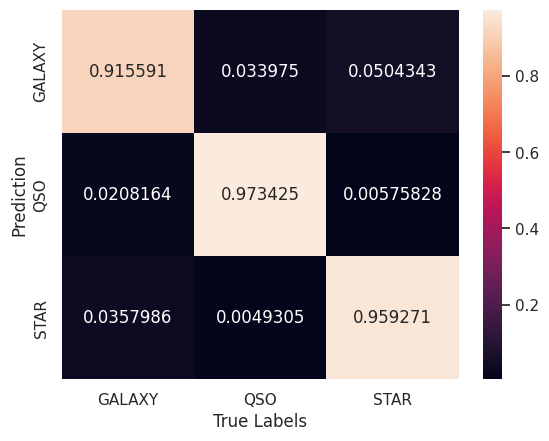

In [84]:
# Viewing the Confusion matrix
from sklearn.metrics import confusion_matrix

cm_knn=confusion_matrix(y_test,y_pred4,normalize='true')

sns.heatmap(cm_knn,annot=True,fmt='g',xticklabels=['GALAXY','QSO','STAR'],yticklabels=['GALAXY','QSO','STAR'])
plt.xlabel('True Labels')
plt.ylabel('Prediction')

### SVM

# Neural Networks

First, we shall do th feature selection again

### Feature Selection

In [85]:
Xr=df[['u','g','r','i','z','redshift','plate']]
yr=df['class']

Here, we need to reencode the class as follows.

### Re-encode

In [86]:
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
l_encode=LabelEncoder()
l_encode.fit(yr)
Yr=l_encode.transform(yr)
Yr=to_categorical(Yr)

Resampling the data

### Resampling the data


In [87]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 30, k_neighbors = 5)
X_r, Y_r = sm.fit_resample(Xr, Yr)

Now, we shall split to training and testing data set

### Splitting to training and testing data set

In [88]:
from sklearn.model_selection import train_test_split
Xr_train, Xr_test, yr_train, yr_test= train_test_split(X_r,Y_r,test_size=0.25,random_state=210)

In [89]:
Xr_train.shape,Xr_test.shape,yr_train.shape,yr_test.shape

((687514, 7), (229172, 7), (687514, 3), (229172, 3))

Now, we shall make the model. For that we have to import th following

## ANN

### Making the model

In [90]:
import tensorflow as tf
#from tensorflow.keras.layers import Dense
#from tensorflow.keras.models import Sequential

Now, we shall start with the model.

In [91]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(128,input_dim=Xr_train.shape[1],activation='relu'),
    tf.keras.layers.Dense(48,activation='relu'),
    #tf.keras.layers.Dense(32,activation='relu'),
    #tf.keras.layers.Dense(15,activation='relu'),
    tf.keras.layers.Dense(3,activation='softmax'),
    ])

In [92]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               1024      
                                                                 
 dense_4 (Dense)             (None, 48)                6192      
                                                                 
 dense_5 (Dense)             (None, 3)                 147       
                                                                 
Total params: 7363 (28.76 KB)
Trainable params: 7363 (28.76 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Compiling the model

In [93]:
start_time=time.time()

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(Xr_train,yr_train,validation_data=(Xr_test,yr_test),epochs=40,verbose=0)

end_time=time.time()

ANN_time=end_time-start_time

<Axes: >

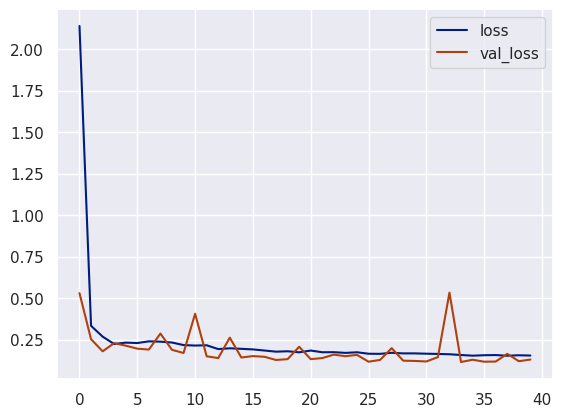

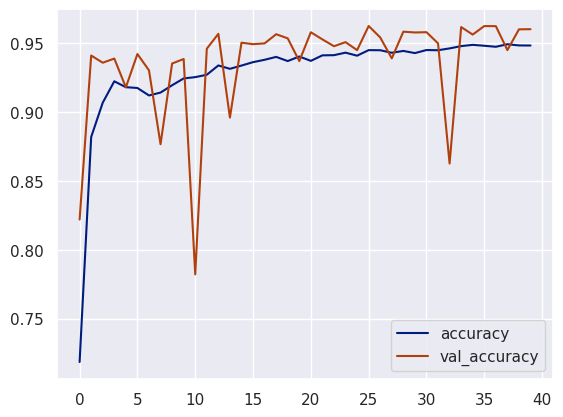

In [94]:
model_loss_acc = pd.DataFrame(model.history.history)
model_loss_acc[['loss', 'val_loss']].plot()
model_loss_acc[['accuracy', 'val_accuracy']].plot()

### Evaluating the model's accuracy

In [95]:
y_pred6=np.round(model.predict(Xr_test))

7162/7162 [==============================] - 10s 1ms/step


In [96]:
y_pred6

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]], dtype=float32)

In [97]:
from sklearn.metrics import recall_score

ann_score=recall_score(yr_test,y_pred6,average='weighted')
ann_score

0.9603223779519313

In [98]:
score_df=score_df.append({'Algorithm':'ANN','Recall_Score':ann_score,'Time':ANN_time},ignore_index=True)
score_df

,Algorithm,Recall_Score,Time
0,Logistic Regression,0.905577,177.109603
1,Decision Tree,0.973636,15.960287
2,Random Forest,0.982703,1795.928527
3,KNN,0.949366,749.475252
4,ANN,0.960322,1690.814534


In [99]:
score_df.sort_values(by='Recall_Score')
score_df.head()

,Algorithm,Recall_Score,Time
0,Logistic Regression,0.905577,177.109603
1,Decision Tree,0.973636,15.960287
2,Random Forest,0.982703,1795.928527
3,KNN,0.949366,749.475252
4,ANN,0.960322,1690.814534


In [100]:
y_pred6.shape

(229172, 3)

In [101]:
yr_test

array([[0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       ...,
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0]])

In [102]:
#confusion_matrix(preds2.argmax(axis = 1), yr_test.argmax(axis = 1))

#plt.figure(figsize = (6,6))
#from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
#ConfusionMatrixDisplay.from_predictions(yr_test.argmax(axis = 1), y_pred6.argmax(axis = 1), display_labels = ['GALAXY', 'QUASAR', 'STAR'])

Text(46.25, 0.5, 'Prediction')

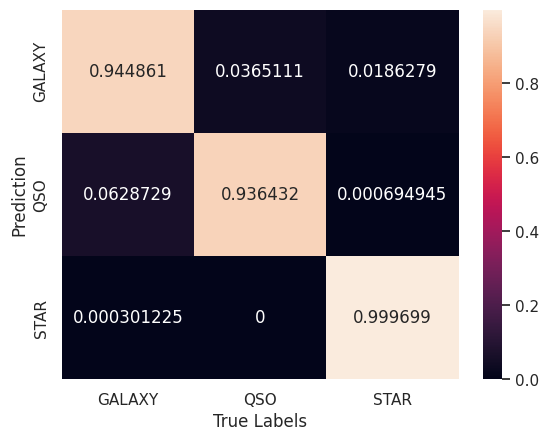

In [103]:
# Viewing the Confusion matrix
from sklearn.metrics import confusion_matrix

cm_ann=confusion_matrix(yr_test.argmax(axis=1),y_pred6.argmax(axis=1),normalize='true')

sns.heatmap(cm_ann,annot=True,fmt='g',xticklabels=['GALAXY','QSO','STAR'],yticklabels=['GALAXY','QSO','STAR'])
plt.xlabel('True Labels')
plt.ylabel('Prediction')

## CNN

In [104]:
#Xr=df[['u','g','r','i','z','redshift','plate']]
#yr=df['class']

In [105]:
#from keras.utils import to_categorical
#from sklearn.preprocessing import LabelEncoder
#l_encode=LabelEncoder()
#l_encode.fit(yr)
#Yr=l_encode.transform(yr)
#Yr=to_categorical(Yr)

In [106]:
#from imblearn.over_sampling import SMOTE
#sm = SMOTE(random_state = 30, k_neighbors = 5)
#X_r, Y_r = sm.fit_resample(Xr, Yr)

In [107]:
#from sklearn.model_selection import train_test_split
#Xr_train, Xr_test, yr_train, yr_test= train_test_split(X_r,Y_r,test_size=0.25,random_state=210)

### Making the model

In [108]:
from tensorflow.keras.layers import Dense, BatchNormalization, Reshape, Flatten, Dropout, Conv1D
from tensorflow.keras.models import Sequential

In [109]:
model_cnn = Sequential(
    [Reshape((1, Xr_train.shape[1],1)),
     Conv1D(filters=10, kernel_size=2, activation='relu',
            input_shape = (1,Xr_train.shape[1],1)),
     Conv1D(filters=10, kernel_size=2, activation='relu'),
     Flatten(),
     Dense(3, activation = 'softmax')
                     ])

### Compiling the Model

In [110]:
start_time=time.time()

model_cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
model_cnn.fit(Xr_train, yr_train, validation_data=(Xr_test, yr_test), epochs = 40, verbose=0)

end_time=time.time()
CNN_time=end_time-start_time

### Plotting the accuracy

<Axes: >

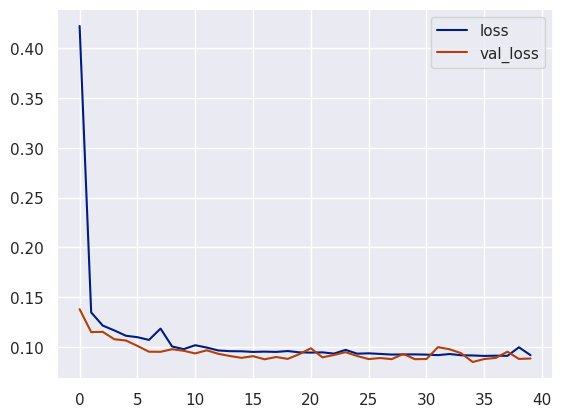

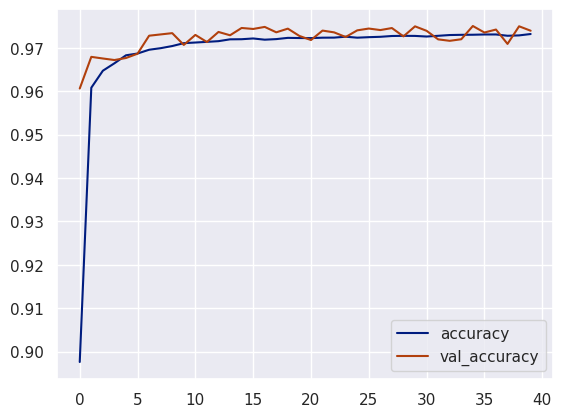

In [111]:
model_cnn_loss_acc = pd.DataFrame(model_cnn.history.history)
model_cnn_loss_acc[['loss', 'val_loss']].plot()
model_cnn_loss_acc[['accuracy', 'val_accuracy']].plot()

### Evaluating the Model's accuracy

In [112]:
y_pred7=np.round(model_cnn.predict(Xr_test))

7162/7162 [==============================] - 11s 2ms/step


In [113]:
from sklearn.metrics import recall_score

cnn_score=recall_score(yr_test,y_pred7,average='weighted')
cnn_score

0.9739104253573735

In [114]:
score_df=score_df.append({'Algorithm':'ANN','Recall_Score':cnn_score,'Time':CNN_time},ignore_index=True)
score_df

,Algorithm,Recall_Score,Time
0,Logistic Regression,0.905577,177.109603
1,Decision Tree,0.973636,15.960287
2,Random Forest,0.982703,1795.928527
3,KNN,0.949366,749.475252
4,ANN,0.960322,1690.814534
5,ANN,0.973910,1943.052089


In [119]:
#score_df.sort_values(by='Recall_Score','Time')
#score_df.head()

Text(46.25, 0.5, 'Prediction')

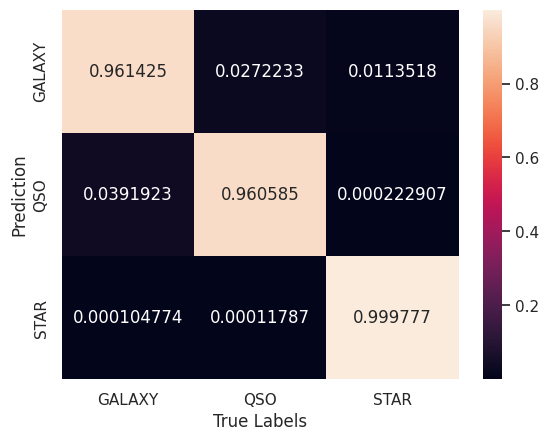

In [116]:
# Viewing the Confusion matrix
from sklearn.metrics import confusion_matrix

cm_cnn=confusion_matrix(yr_test.argmax(axis=1),y_pred7.argmax(axis=1),normalize='true')

sns.heatmap(cm_cnn,annot=True,fmt='g',xticklabels=['GALAXY','QSO','STAR'],yticklabels=['GALAXY','QSO','STAR'])
plt.xlabel('True Labels')
plt.ylabel('Prediction')

# Comparing all the algorithms

Text(787.8409090909089, 0.5, 'Prediction')

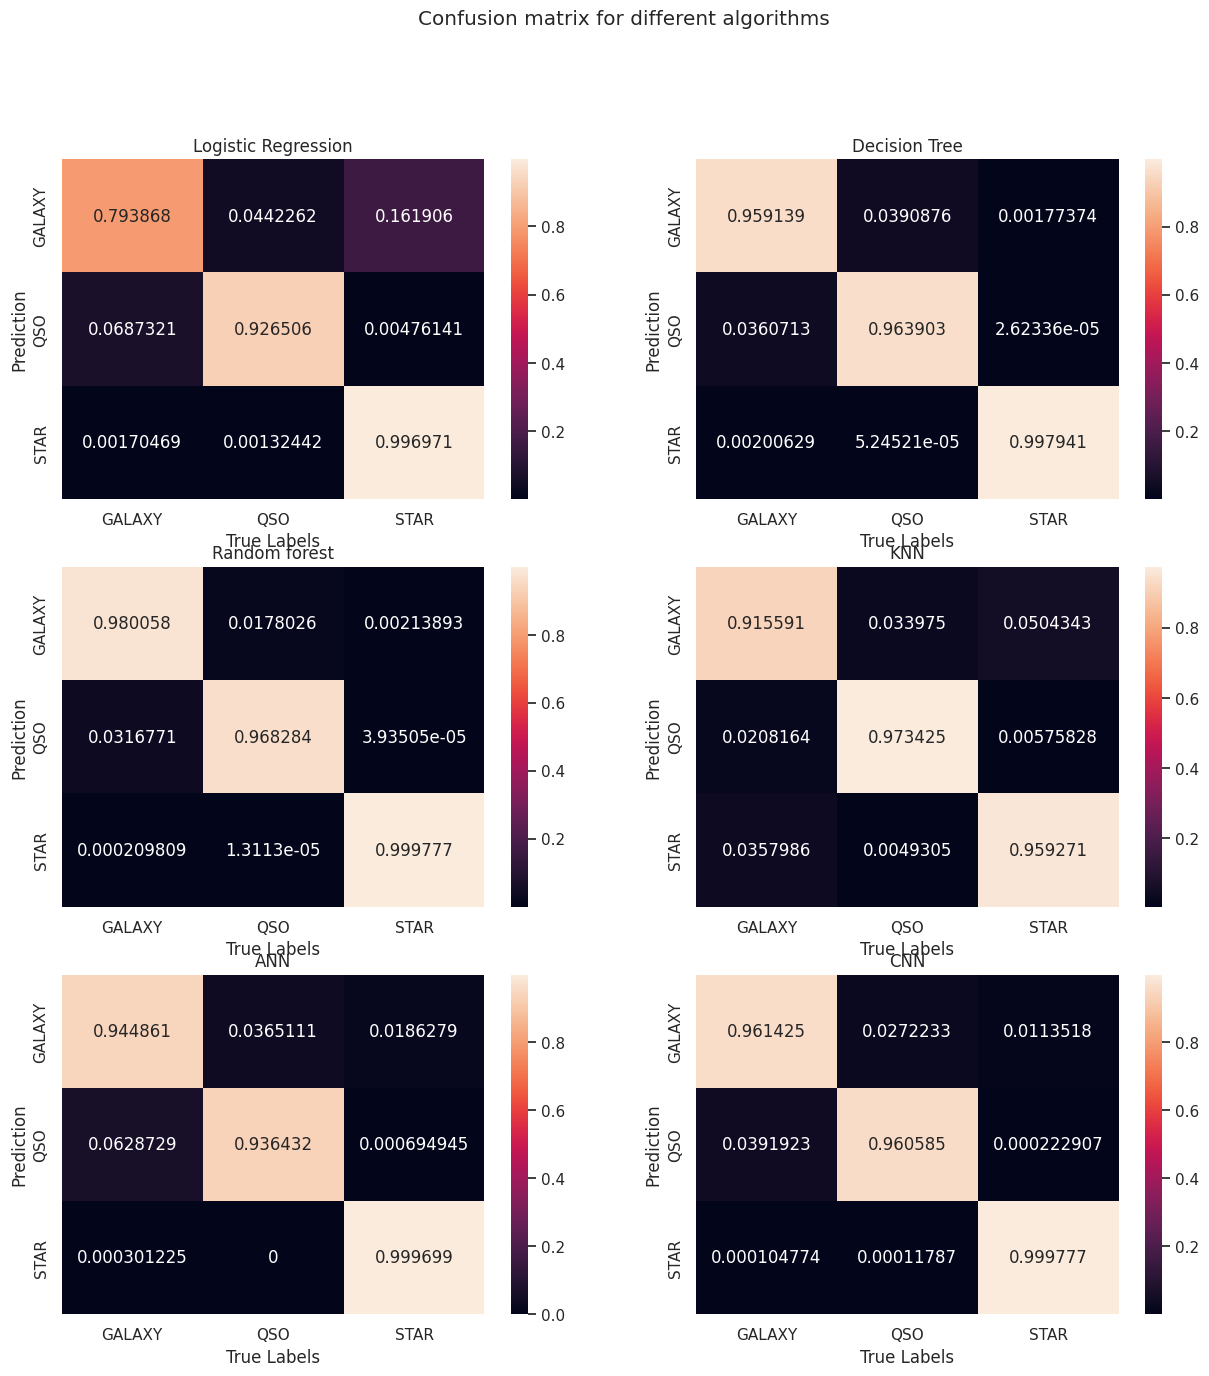

In [120]:
plt.figure(figsize=(15,15))
plt.suptitle('Confusion matrix for different algorithms')

plt.subplot(321)
plt.title('Logistic Regression')
sns.heatmap(cm_lr,annot=True,fmt='g',xticklabels=['GALAXY','QSO','STAR'],yticklabels=['GALAXY','QSO','STAR'])
plt.xlabel('True Labels')
plt.ylabel('Prediction')

plt.subplot(322)
plt.title('Decision Tree')
sns.heatmap(cm_dt,annot=True,fmt='g',xticklabels=['GALAXY','QSO','STAR'],yticklabels=['GALAXY','QSO','STAR'])
plt.xlabel('True Labels')
plt.ylabel('Prediction')

plt.subplot(323)
plt.title('Random forest')
sns.heatmap(cm_rf,annot=True,fmt='g',xticklabels=['GALAXY','QSO','STAR'],yticklabels=['GALAXY','QSO','STAR'])
plt.xlabel('True Labels')
plt.ylabel('Prediction')

plt.subplot(324)
plt.title('KNN')
sns.heatmap(cm_knn,annot=True,fmt='g',xticklabels=['GALAXY','QSO','STAR'],yticklabels=['GALAXY','QSO','STAR'])
plt.xlabel('True Labels')
plt.ylabel('Prediction')

plt.subplot(325)
plt.title('ANN')
sns.heatmap(cm_ann,annot=True,fmt='g',xticklabels=['GALAXY','QSO','STAR'],yticklabels=['GALAXY','QSO','STAR'])
plt.xlabel('True Labels')
plt.ylabel('Prediction')

plt.subplot(326)
plt.title('CNN')
sns.heatmap(cm_cnn,annot=True,fmt='g',xticklabels=['GALAXY','QSO','STAR'],yticklabels=['GALAXY','QSO','STAR'])
plt.xlabel('True Labels')
plt.ylabel('Prediction')